## Problem
Some input features can be highly correlated i.e. have a similar meaning. This adds redundancy and adds unnecessary dimensions. For example, annual income and monthly income are two different features, which essentially mean the same thing. 

## Solution
Find similar input features and eliminate this redundancy. 

## Principal Component Analysis (PCA) algorithm
![img](https://image.slidesharecdn.com/principalcomponentanalysis-130916163816-phpapp01/95/principal-component-analysis-18-638.jpg?cb=1379350085)



When I first tried to understand PCA, I found it quite daunting. <br>
<img src="https://i.warosu.org/data/cgl/img/0084/62/1436443458215.png" alt="img" style="width: 500px;"/>

## Understanding PCA Graphically

PCA is a technique used to reduce dimensionality. We know that while plotting data, each input feature corresponds to one dimension. Hence, graphically, PCA is the equivalent of representing high-dimension data in a low-dimension space. For example, representing a 3D Cube in a 2D space. Sounds simpler now?

But how do we do this, mathematically? 

We use <strong>projections</strong>.

Projections help us find the low-dimensional "shadow" of a high-dimensional object.
<br> Look at this example: <br>
![img](https://alliance.seas.upenn.edu/~cis520/dynamic/2017/wiki/uploads/Lectures/pca-example-1D-of-2D_small.png)

Here, we project points in a 2D space onto a 1D line. Yes, some information is indeed lost, but if the correlation between X and Y is high, the information loss is negligible. 

The PCA algorithm is used to find this 1D line (called the Principal Component), which is called "U1" in the above image. 

### Example

We will take 3 input features - annual salary (ansal), monthly salary (mosal) and age (age). We will plot this data in a 3D space. Then, we will apply PCA and reduce this to a 2D feature space. Finally, we will plot the data in a 2D space and compare the results.

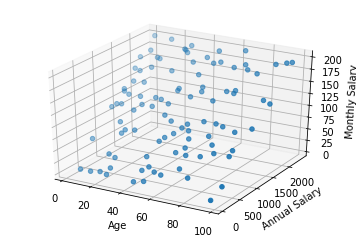

In [12]:
import numpy as np

mosal = np.random.randint(0,200, 100, np.int32) # Monthly salary
ansal = mosal * 12 # Annual salary = Monthly salary * 12 (HIGHLY CORRELATED! REDUNDANT!)
age = np.random.randint(0,99, 100, np.int32) # Age

from mpl_toolkits.mplot3d import Axes3D # For 3D plots
import matplotlib.pyplot as plt

# Plotting the 3 features in a 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age, ansal, mosal)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Salary')
ax.set_zlabel('Monthly Salary')

plt.show()

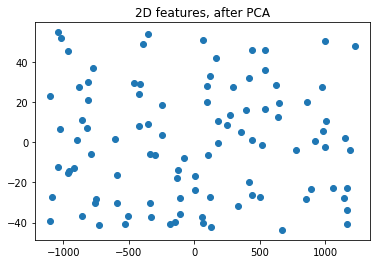

In [17]:
# Applying PCA
input_features = np.asarray(list(zip(age, ansal, mosal)))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
new_features = pca.fit_transform(input_features)

new_features = new_features.T # Transposing to get features in rows instead of columns, so that plotting is easy. No biggie. 

plt.scatter(new_features[0], new_features[1])
plt.title("2D features, after PCA")
plt.show()

An excellent and detailed explanation of PCA is available [here](https://www.coursera.org/learn/machine-learning/lecture/ZYIPa/principal-component-analysis-algorithm)